Shape: (10000, 7)
0
Train size: (8000, 6) Test size: (2000, 6)
Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1133
           1       1.00      1.00      1.00       867

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



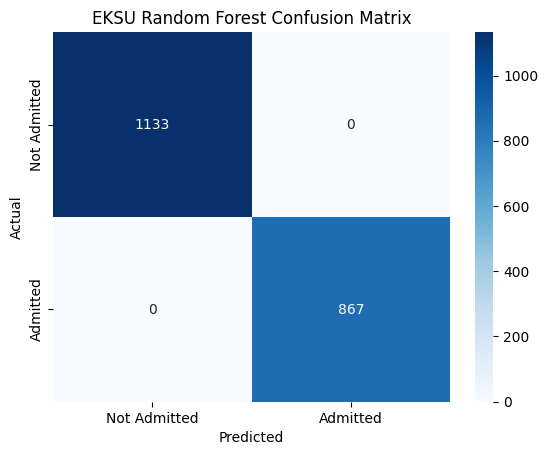

EKSU model saved successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

# Load EKSU processed dataset
eksu_df = pd.read_csv("../../Data/EKSU_processed.csv")
print("Shape:", eksu_df.shape)
eksu_df.head()

# Check target column for missing values
print(eksu_df['admitted_numeric'].isna().sum())

# Drop rows with missing targets
eksu_df = eksu_df.dropna(subset=['admitted_numeric'])

# Define features (X) and target (y)
X = eksu_df[['UTME_Score', 'Screening_Score', 'Faculty', 'Department',
             'Olevel_Valid', 'olevel_avg_points']]
y = eksu_df['admitted_numeric']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Preprocessing (OneHotEncode categorical features)
categorical_features = ['Faculty', 'Department']
numeric_features = ['UTME_Score', 'Screening_Score', 'Olevel_Valid', 'olevel_avg_points']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Random Forest Model
random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Admitted", "Admitted"],
            yticklabels=["Not Admitted", "Admitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("EKSU Random Forest Confusion Matrix")
plt.show()

# Save Model
os.makedirs("../../Models", exist_ok=True)
joblib.dump(random_forest, "../../Models/eksu_admission_model.pkl")
print("EKSU model saved successfully!")
